# Monte Carlo with Pi

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(12345)

## Intro

Monte Carlo methods use randomness to compute a numeric value. The most popular method is called Monte Carlo integration. There are a couple of ways to estimate the value of $\pi$ using monte carlo methods. Two ways include

- Simple way using area
- Using probability of getting a pair of coprime numbers
  - https://en.wikipedia.org/wiki/Coprime_integers#Probability_of_coprimality
- Buffon's Needle Problem
  - https://www.cut-the-knot.org/ctk/August2001.shtml
  - https://mste.illinois.edu/activity/buffon/

This notebook will go over using the area method. The coprime method can be done as an exercise.

## Using Area

From [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview)

Consider a quadrant (circular sector) inscribed in a unit square. Given that the ratio of their areas is $\frac{\pi}{4}$, the value of $\pi$ can be approximated using a Monte Carlo method:

- Draw a square, then inscribe a quadrant (quarter-circle) within it
- Uniformly scatter a given number of points over the square
- Count the number of points inside the quadrant, i.e. having a distance from the origin of less than 1
- The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas, $\pi/4$. Multiply the result by 4 to estimate $\pi$

### The Exercise

Use the directions above to estimate the value of pi. Print out the estimated value and the also compute the error with the "actual" value of pi using `np.pi`. Here are some hints (for object-oriented approach):

- Start with `fig, ax = plt.subplots(figsize=(6, 6))`, then use `ax` to draw your plots and set your `xlim`, `ylim`
- You can draw a circle with `plt.Circle()`
- Create a mask (an array of Booleans), where each element is True if the corresponding point is in the circle.
- Use `ax.scatter(your data, c=mask, cmap='RdBu')` to create your scatterplot

Bonus points if you make a function, so that you can reuse your code on different number of simulations. When you use 1000 random numbers, you should get something like the below figure.

Estimated Value of Pi: 3.124
Error:  0.017592653589793006


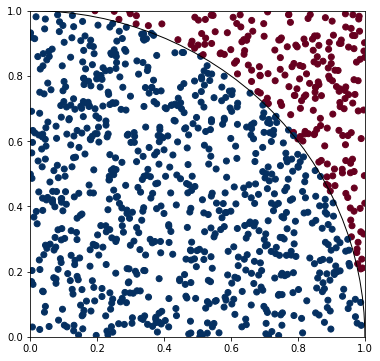

[0.75416793 0.19946427] 0.7800995242766334 True
[0.61337504 0.28067023] 0.6745403725047646 True
[0.51636364 0.27548845] 0.5852566035555691 True
[0.09491021 0.17837082] 0.20204973691103104 True
[0.4685518  0.28476399] 0.5482985711975209 True
Pi: 3.141612368


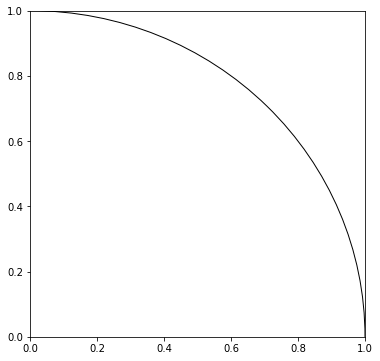

In [5]:
fig, ax = plt.subplots(figsize = (6,6)) # create plot
plt.xlim(0, 1) # set x axis bounds from 0 to 1
plt.ylim(0, 1) # set y axis bounds from 0 to 1
data = np.random.rand(int(1e9), 2) # get 10000 random points
distances = np.sqrt((data ** 2).sum(axis = 1)) # get distance from each point to origin
ax.add_patch(plt.Circle((0, 0), 1, facecolor = 'none', edgecolor = 'black')) # add circle to plot
mask = distances < 1.0 # mask[i] is true if distance[i] < 1.0 (within circle), else false
pi = 4 * (np.sum(mask) / len(mask)) # count amount of points within circle,
                                        # divide by total number of points,
                                        # then multiply by 4 to get pi approximation
for i in range(5):
    print(data[i], distances[i], mask[i])
print(f'Pi: {pi}')
# ax.scatter(*data.T, c = mask, cmap = 'RdBu')

## Extras: Manually Calculating Pi

Physics Girl and Veritasium did the area method with darts.

[![area](http://img.youtube.com/vi/M34TO71SKGk/0.jpg)](https://www.youtube.com/watch?v=M34TO71SKGk)

Matt Parker did the corprime method with dice

[![coprime](http://img.youtube.com/vi/RZBhSi_PwHU/0.jpg)](http://www.youtube.com/watch?v=RZBhSi_PwHU)